In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 22})

In [2]:
start_date = dt.date(2020, 1, 24)

In [16]:
df = pd.DataFrame()
ii = 0
for i in range(1, 500):
    tally_file = '/data/medical/simulations/milan500-1/res-{}.csv'.format(i)
    t = pd.read_csv(tally_file)
    cases = t['H'].diff()
    df[ii] = cases
    ii += 1

In [17]:
cdf = df

In [18]:
cdf.index = cdf.index.map(lambda i: start_date + dt.timedelta(days = i))

In [19]:
cdf2 = cdf.drop([13, 26], axis=1)

<AxesSubplot:>

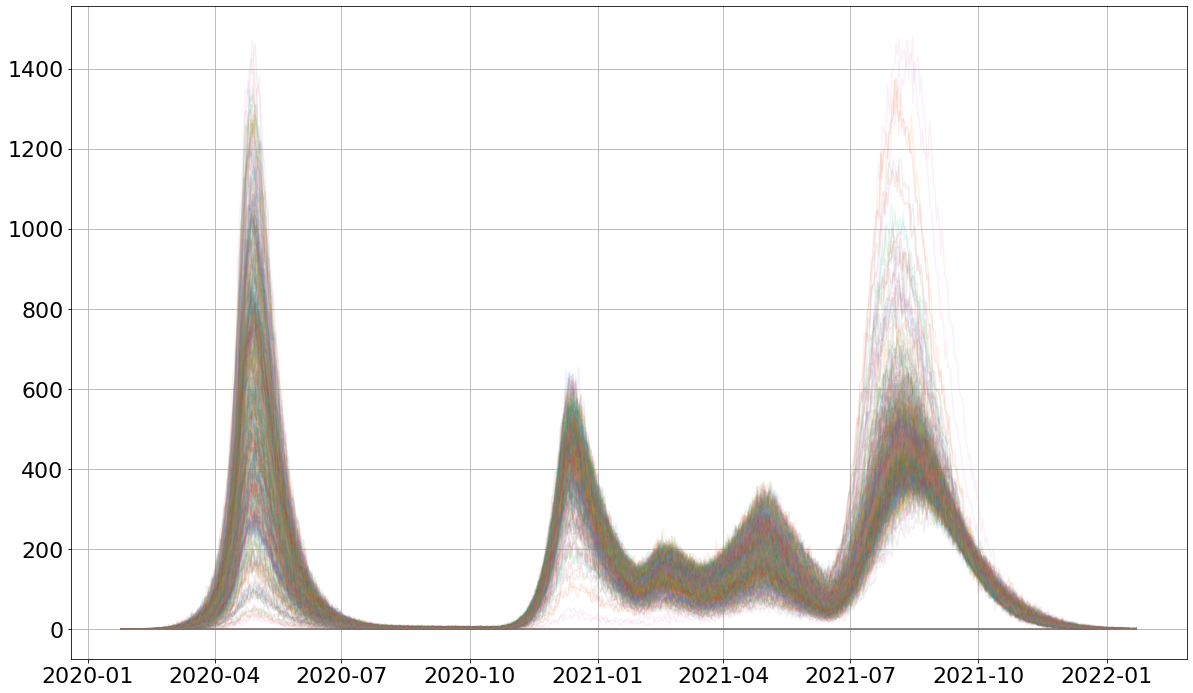

In [20]:
cdf2.plot(alpha=0.1, legend=None, figsize=(20,12), grid=True)

<ErrorbarContainer object of 3 artists>

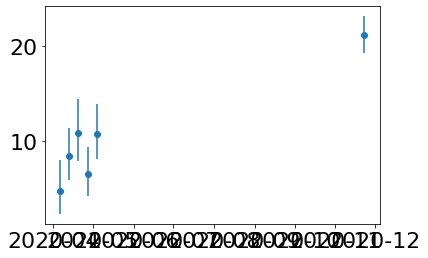

In [11]:
sero_dates = pd.to_datetime(pd.Series(['2020-04-06', '2020-04-13', '2020-04-20', '2020-04-27', '2020-05-04', '2020-11-23']))
sero_means = pd.Series([4.8, 8.5, 10.9, 6.6, 10.8, 21.1])
sero_lo = sero_means - [2.4, 5.9, 7.9, 4.3, 8.2, 19.2]
sero_hi = [8.0, 11.4, 14.4, 9.4, 13.9, 23.1] - sero_means
err = [sero_lo.array, sero_hi.array]
plt.errorbar(sero_dates, sero_means, err, fmt='o')

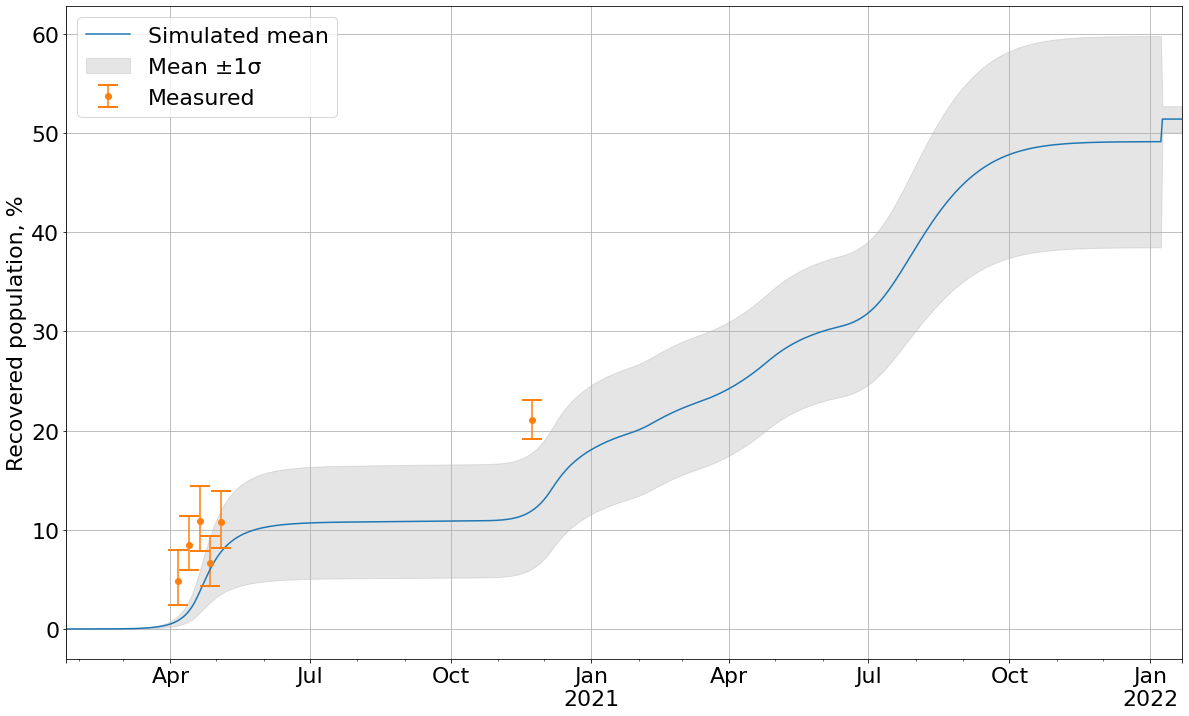

In [14]:
means = cdf2.mean(axis=1)
means.index = pd.to_datetime(means.index)
sero_means.index = pd.to_datetime(sero_means.index)
errors = cdf2.std(axis=1)
fig, ax = plt.subplots(1, 1, figsize=(20, 12))
means.plot(grid=True, ax = ax, color='C0')
ax.errorbar(sero_dates.values, sero_means, err, capsize=10, capthick=2, fmt='o', color='C1')
#(means + errors).plot(ax = ax)
#(means - errors).plot(ax = ax)
ax.fill_between(cdf2.index, means+errors, means-errors, color='grey', alpha=0.2)
ax.set_ylabel('Recovered population, %')
ax.legend(['Simulated mean', 'Mean ±1σ', 'Measured'], loc='upper left')
plt.savefig('/home/atemerev/Documents/sero_bars.pdf', bbox_inches='tight')
plt.show()

In [10]:
all_cases = pd.read_csv('/data/medical/covid/2021-04-21/cases.csv', sep=';', index_col=0, encoding='cp1252', parse_dates=[1,2], low_memory=False)
cases_hosp = all_cases.query('hospitalisation == 1 and ktn == "GE"')
cases = cases_hosp
cases_count = pd.DataFrame(cases.groupby('fall_dt')['eingang_dt'].count())
cases_count.columns = ['Actual cases']
cases_count = cases_count.rename_axis('Date')
period = pd.date_range(cases_count.index[0], cases_count.index[-1])
cases_count = cases_count.reindex(period, fill_value=0)[:-1]
cases_count = cases_count.cumsum()
cases_count

Actual cases
2020-03-01             1
2020-03-02             1
2020-03-03             1
2020-03-04             1
2020-03-05             2
...                  ...
2021-04-14          1488
2021-04-15          1493
2021-04-16          1494
2021-04-17          1495
2021-04-18          1497

[414 rows x 1 columns]

<AxesSubplot:>

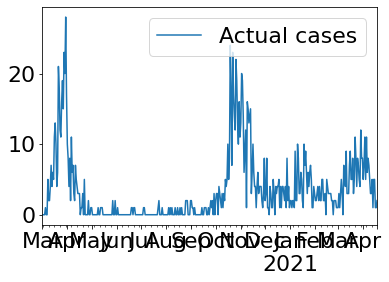

In [13]:
cases_count.diff().plot()

AttributeError: 'DataFrame' object has no attribute 'errorbar'

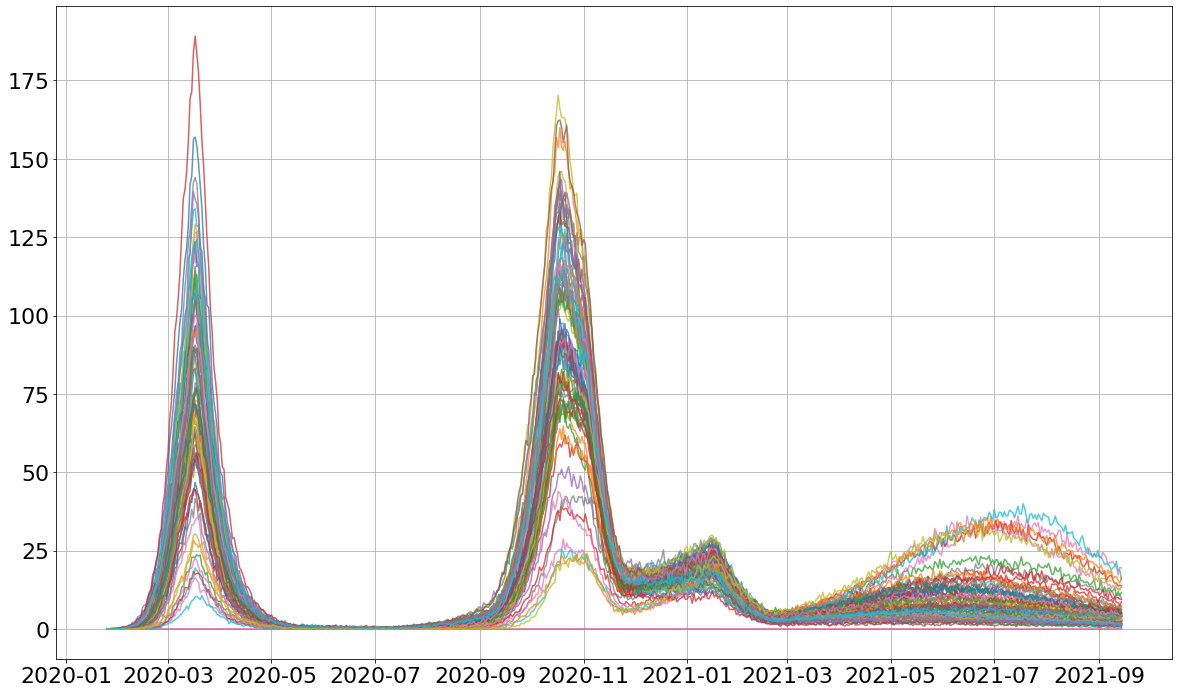

In [16]:
ax = cdf.diff().plot(alpha=0.75, legend=None, figsize=(20,12), grid=True)
cases_count.diff().plot(ax = ax, color='black')
plt.show()

In [37]:
means = cdf.diff().mean(axis=1)
errors = cdf.diff().std(axis=1)

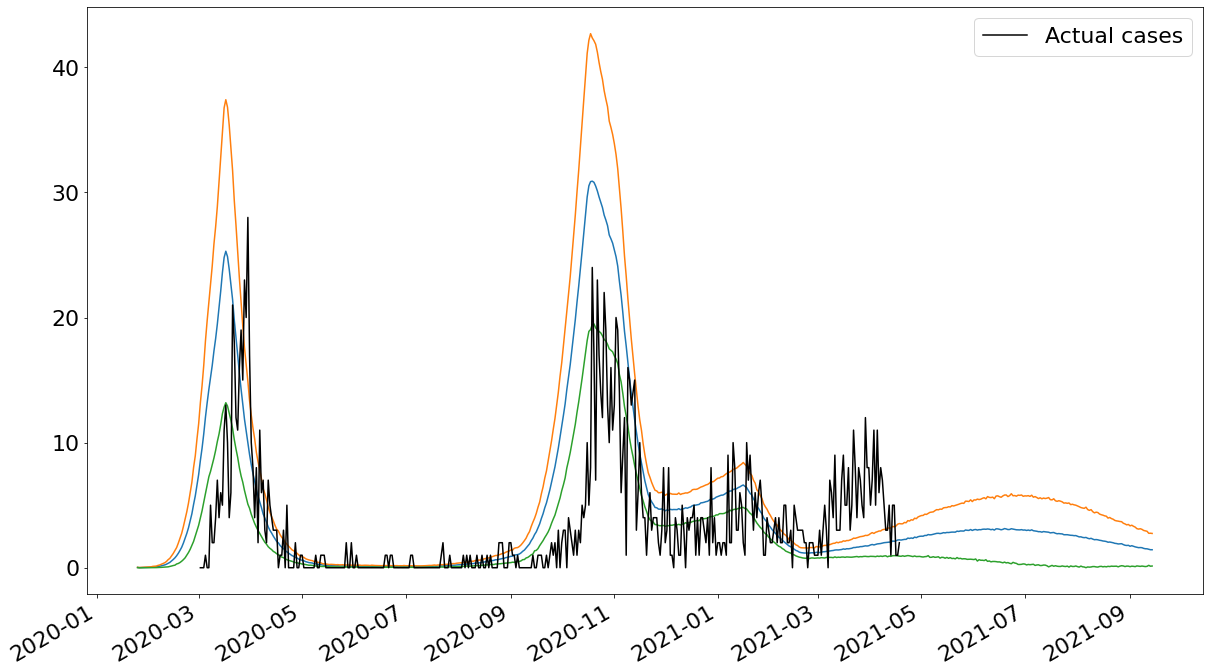

In [38]:
ax = means.plot(figsize = (20, 12))
(means + errors).plot(ax = ax)
(means - errors).plot(ax = ax)
cases_count.diff().plot(ax = ax, color='black')
plt.show()